# <span style='color:Blue'>  ***Credit Card Fraud Detection With Machine Learning in Python*** </span>

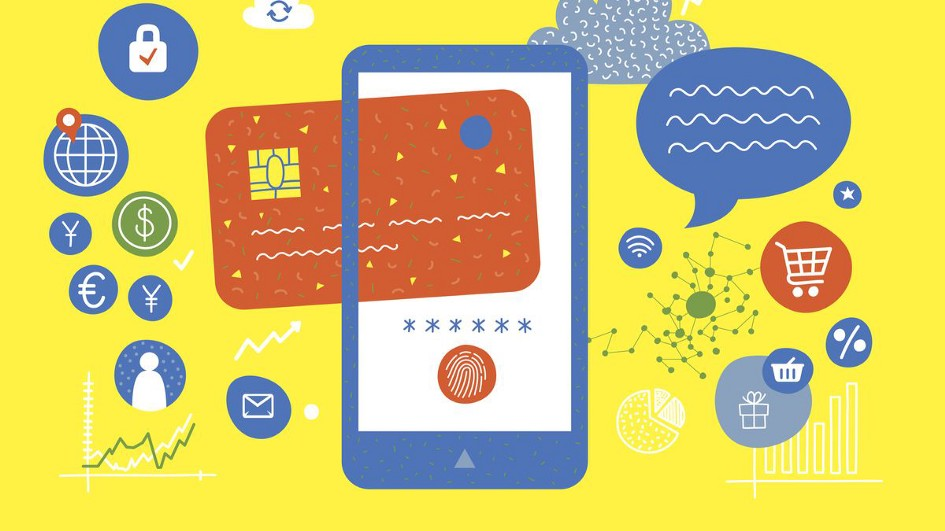

***************************************************************************************************************************

## <span style='color:Blue'>  ***CLASSIFICATION ALGORITHMS USED IN THIS PROJECT ARE:-*** </span>

* Decision Tree
* K-Nearest Neighbors
* Logistic Regression
* SVM
* Random Forest Tree
* XGBoost
* Naive Bayes

                        Steps Involved
                        --------------
* Importing the required packages into the python environment.
* Importing the data
* Processing the data to our needs and Exploratory Data Analysis
* Feature Selection and Data Split
* Building seven types of classification models
* Evaluating the created classification models using the evaluation metrics

# <span> ***Importing the Packages*** </span>

In [41]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization


from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm
from sklearn.naive_bayes import GaussianNB #Naive Bayes algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

# <span> ***Importing Data*** </span>

ABOUT THE DATA: 
* The data we are going to use is the Kaggle Credit Card Fraud Detection dataset (link:-"https://www.kaggle.com/mlg-ulb/creditcardfraud"). It contains features V1 to V28 which are the principal components obtained by PCA.The remaining features are the 'Time',the  ‘Amount’ feature that contains the total amount of money being transacted and the ‘Class’ feature that contains whether the transaction is a fraud case or not.
* Now let’s import the data using the ‘read_csv’ method and print the data to have a look at it in python.

In [43]:
import pandas as pd
data=pd.read_csv("C:\\Users\\krishna\\Downloads\\creditcardproject.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.columns 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

 The time feature which is of no use to build the models.so,we are droping this feature from the dataset

In [7]:
data.drop('Time',axis = 1, inplace = True)
#data.head()


In [8]:
#pip install xgboost

# Data Processing and EDA

Let’s have a look at how many fraud cases and non-fraud cases are there in our dataset. Along with that, let’s also compute the percentage of fraud cases in the overall recorded transactions. Let’s do it in python!

In [10]:
cases = len(data)
nonfraud_count = len(data[data.Class == 0])
fraud_count = len(data[data.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)
print("Total number of cases are",cases)
print("number of non-fraud cases are",nonfraud_count)
print("number of  fraud cases are",fraud_count)
print("Percentage of fraud_cases is",fraud_percentage)

Total number of cases are 284807
number of non-fraud cases are 284315
number of  fraud cases are 492
Percentage of fraud_cases is 0.17


We can see that out of 284,807 samples, there are only 492 fraud cases which is only 0.17 percent of the total samples. So, we can say that the data we are dealing with is highly imbalanced data and needs to be handled carefully when modeling and evaluating.
Next, we are going to get a statistical view of both fraud and non-fraud transaction amount data using the ‘describe’ method in python.

In [11]:
nonfraud_cases = data[data.Class == 0]
fraud_cases = data[data.Class == 1]

print('                CASE AMOUNT STATISTICS')
print("                ----------------------")

print('  NON-FRAUD CASE AMOUNT STATS  ')
print(' ----------------------------')
print(nonfraud_cases.Amount.describe())

print('  FRAUD CASE AMOUNT STATS')
print('  -----------------------')
print(fraud_cases.Amount.describe())


                CASE AMOUNT STATISTICS
                ----------------------
  NON-FRAUD CASE AMOUNT STATS  
 ----------------------------
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
  FRAUD CASE AMOUNT STATS
  -----------------------
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


## Normalization

While seeing the statistics, it is seen that the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables. To reduce its wide range of values, we can normalize it using the ‘StandardScaler’ method in python.

In [12]:
sc = StandardScaler()
amount = data['Amount'].values

data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
data['Amount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

# Feature Selection & Data Split:
In this process, we are going to define the independent (X) and the dependent variables (Y). Using the defined variables, we will split the data into a training set and testing set which is further used for modeling and evaluating. We can split the data easily using the ‘train_test_split’ algorithm in python.

In [13]:
X = data.drop('Class', axis = 1).values
y = data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print( X_train[:1])
print(X_test[0:1])
print( y_train[0:20])
print( y_test[0:20])
#print('X',X_train)

[[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489557  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
[[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440064 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726225  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Modeling
In this step, we will be building seven different types of classification models namely Decision Tree, K-Nearest Neighbors (KNN), Logistic Regression, Support Vector Machine (SVM), Random Forest,Naive Bayes and XGBoost. Even though there are many more models which we can use, these are the most popular models used for solving classification problems. All these models can be built feasibly using the algorithms provided by the scikit-learn package. Only for the XGBoost model, we are going to use the xgboost package. Let’s implement these models in python.

## <span style='color:green'> ***Decision Tree*** </span>

In [14]:
# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

## <span style='color:blue'> ***K-Nearest Neighbor*** </span>

In [15]:
# K-Nearest Neighbors
n = 5

knn = KNeighborsClassifier(n_neighbors = n) 
knn.fit(X_train, y_train) 
knn_yhat = knn.predict(X_test)

## <span style='color:red'> ***Logistic Regression*** </span>

In [16]:
# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

## <span style='color:pink'> ***SVM*** </span>

In [17]:
# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

## <span style='color:green'> ***Random Forest*** </span>

In [18]:
# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

## <span style='color:brown'> ***XGBoost*** </span>

In [19]:
# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

C:\Users\krishna\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:23:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## <span style='color:orange'> ***Naive Bayes*** </span>

In [53]:
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,y_train)
naive_bayes_yhat=naive_bayes.predict(X_test)


## Key points about the models
* In the above code blocks, we have built seven different types of classification models starting from the Decision tree model to the XGBoost model. Now let’s breakdown the code.
* Starting with the decision tree, we have used the ‘DecisionTreeClassifier’ algorithm to build the model. Inside the algorithm, we have mentioned the ‘max_depth’ to be ‘4’ which means we are allowing the tree to split four times and the ‘criterion’ to be ‘entropy’ which is most similar to the ‘max_depth’ but determines when to stop splitting the tree. Finally, we have fitted and stored the predicted values into the ‘tree_yhat’ variable.
* Next is the K-Nearest Neighbors (KNN). We have built the model using the ‘KNeighborsClassifier’ algorithm and mentioned the ‘n_neighbors’ to be ‘5’. The value of the ‘n_neighbors’ is randomly selected but can be chosen optimistically through iterating a range of values, followed by fitting and storing the predicted values into the ‘knn_yhat’ variable.
* There is nothing much to explain about the code for Logistic regression as we kept the model in a way more simplistic manner by using the ‘LogisticRegression’ algorithm and as usual, fitted and stored the predicted variables in the ‘lr_yhat’ variable.
* We built the Support Vector Machine model using the ‘SVC’ algorithm and we didn’t mention anything inside the algorithm as we managed to use the default kernel which is the ‘rbf’ kernel. After that, we stored the predicted values into the ‘svm_yhat’ after fitting the model.
* The next model is the Random forest model which we built using the ‘RandomForestClassifier’ algorithm and we mentioned the ‘max_depth’ to be 4 just like how we did to build the decision tree model. Finally, fitting and storing the values into the ‘rf_yhat’. Remember that the main difference between the decision tree and the random forest is that, decision tree uses the entire dataset to construct a single model whereas, the random forest uses randomly selected features to construct multiple models. That’s the reason why the random forest model is used versus a decision tree.
* The next model is the XGBoost model. We built the model using the ‘XGBClassifier’ algorithm provided by the xgboost package. We mentioned the ‘max_depth’ to be 4 and finally, fitted and stored the predicted values into the ‘xgb_yhat’.
* Our final model is Naive Bayes.There is nothing much to explain about the code for Naive Bayes as we kept the model in a way more simplistic manner by using the ‘GaussianNB’ algorithm and as usual, fitted and stored the predicted variables in the ‘naive_bayes_yhat’ variable.
* With that, we have successfully built our six types of classification models and interpreted the code for easy understanding. Our next step is to evaluate each of the models and find which is the most suitable one for our case.

## Evaluation
Our main objective in this process is to find the best model for our given case. The evaluation metrics we are going to use are the accuracy score metric, f1 score metric, and finally the confusion matrix.

## 1) Accuracy score:
* Accuracy score = No.of correct predictions / Total no.of predictions

In [54]:


print('ACCURACY SCORE')
print("----------------")
print('Accuracy score of the Decision Tree model is ',(accuracy_score(y_test, tree_yhat)))
print('Accuracy score of the KNN model is',(accuracy_score(y_test, knn_yhat)))
print('Accuracy score of the Logistic Regression model is',(accuracy_score(y_test, lr_yhat)))
print('Accuracy score of the SVM model is ',(accuracy_score(y_test, svm_yhat)))
print('Accuracy score of the Random Forest Tree model is',(accuracy_score(y_test, rf_yhat)))
print('Accuracy score of the XGBoost model is ',(accuracy_score(y_test, xgb_yhat)))
print('Accuracy score of the Naive Bayes model is ',(accuracy_score(y_test, naive_bayes_yhat)))



ACCURACY SCORE
----------------
Accuracy score of the Decision Tree model is  0.9993679997191109
Accuracy score of the KNN model is 0.9995259997893332
Accuracy score of the Logistic Regression model is 0.9991924440855307
Accuracy score of the SVM model is  0.9993153330290369
Accuracy score of the Random Forest Tree model is 0.9993153330290369
Accuracy score of the XGBoost model is  0.9994908886626171
Accuracy score of the Naive Bayes model is  0.9783364348161933


### conclusion:
According to the accuracy score evaluation metric, the KNN model reveals to be the most accurate model and the Naive Bayes model to be the least accurate model. However, when we round up the results of each model except naive bayes, it shows 0.99 (99% accurate) which is a very good score.

### 2) F1 SCORE:
* F1 score = 2( (precision * recall) / (precision + recall) )

In [57]:


print('F1 SCORE')
print('---------')
print('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)))
print('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)))
print('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)))
print('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)))
print('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)))
print('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)))
print('F1 score of the Naive Bayes model is {}'.format(f1_score(y_test, naive_bayes_yhat)))



F1 SCORE
---------
F1 score of the Decision Tree model is 0.8105263157894738
F1 score of the KNN model is 0.8571428571428572
F1 score of the Logistic Regression model is 0.7356321839080459
F1 score of the SVM model is 0.7771428571428572
F1 score of the Random Forest Tree model is 0.7796610169491525
F1 score of the XGBoost model is 0.8449197860962566
F1 score of the Naive Bayes model is 0.12233285917496445


#### CONCLUSION:-
The ranking of the models is almost similar to the previous evaluation metric. On basis of the F1 score evaluation metric, the KNN model snatches the first place again and the Naive Bayes model remains to be the least accurate model.

# 3. Confusion Matrix

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

In [58]:
tree_matrix = confusion_matrix(y_test, tree_yhat) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat) # XGBoost
naive_bayes_matrix = confusion_matrix(y_test, naive_bayes_yhat) 


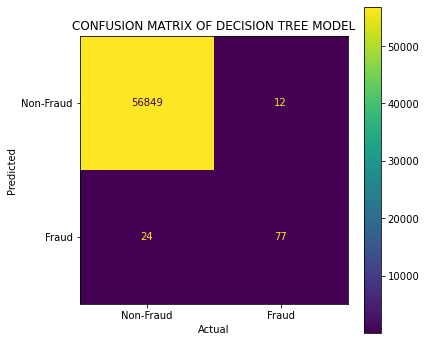

In [29]:
tree_matrix_plot=ConfusionMatrixDisplay(tree_matrix,display_labels=["Non-Fraud","Fraud"])
tree_matrix_plot.plot()
tree_matrix_plot.ax_.set(title="CONFUSION MATRIX OF DECISION TREE MODEL",xlabel="Actual",ylabel="Predicted")
plt.show()


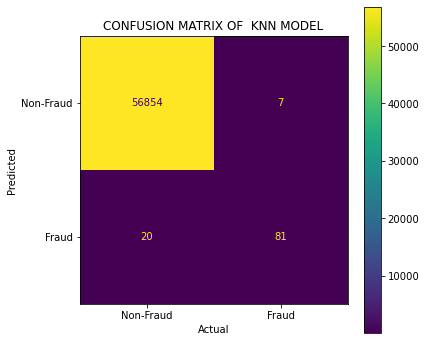

In [30]:
knn_matrix_plot=ConfusionMatrixDisplay(knn_matrix,display_labels=["Non-Fraud","Fraud"])
knn_matrix_plot.plot()
knn_matrix_plot.ax_.set(title="CONFUSION MATRIX OF  KNN MODEL",xlabel="Actual",ylabel="Predicted")
plt.show()


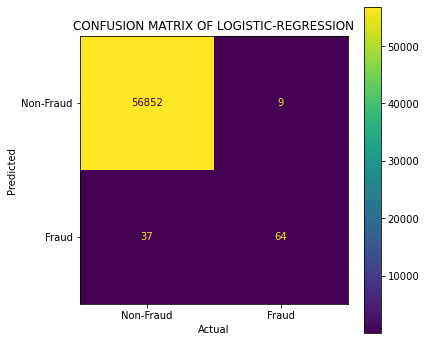

In [34]:
lr_matrix_plot=ConfusionMatrixDisplay(lr_matrix,display_labels=["Non-Fraud","Fraud"])
lr_matrix_plot.plot()
lr_matrix_plot.ax_.set(title="CONFUSION MATRIX OF LOGISTIC-REGRESSION",xlabel="Actual",ylabel="Predicted")
plt.show()


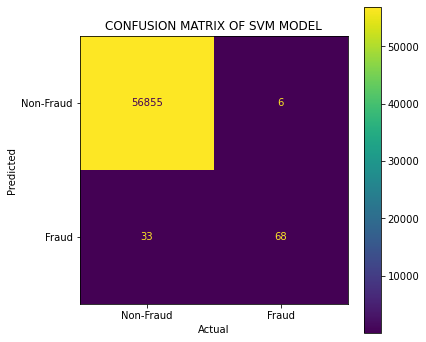

In [35]:
svm_matrix_plot=ConfusionMatrixDisplay(svm_matrix,display_labels=["Non-Fraud","Fraud"])
svm_matrix_plot.plot()
svm_matrix_plot.ax_.set(title="CONFUSION MATRIX OF SVM MODEL",xlabel="Actual",ylabel="Predicted")
plt.show()


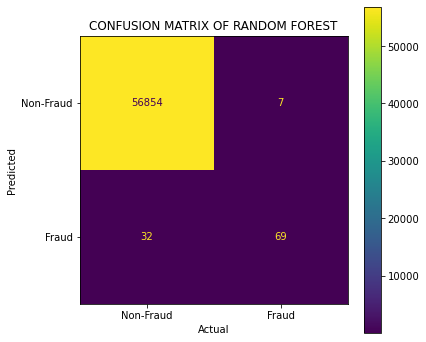

In [37]:
rf_matrix_plot=ConfusionMatrixDisplay(rf_matrix,display_labels=["Non-Fraud","Fraud"])
rf_matrix_plot.plot()
rf_matrix_plot.ax_.set(title="CONFUSION MATRIX OF RANDOM FOREST",xlabel="Actual",ylabel="Predicted")
plt.show()


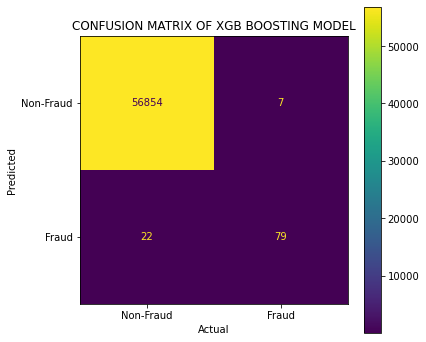

In [39]:
xgb_matrix_plot=ConfusionMatrixDisplay(xgb_matrix,display_labels=["Non-Fraud","Fraud"])
xgb_matrix_plot.plot()
xgb_matrix_plot.ax_.set(title="CONFUSION MATRIX OF XGB BOOSTING MODEL",xlabel="Actual",ylabel="Predicted")
plt.show()


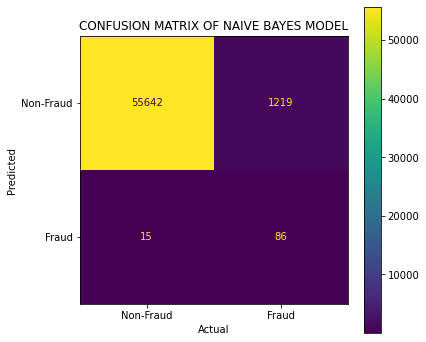

In [60]:
naive_bayes_matrix_plot=ConfusionMatrixDisplay(naive_bayes_matrix,display_labels=["Non-Fraud","Fraud"])
naive_bayes_matrix_plot.plot()
naive_bayes_matrix_plot.ax_.set(title="CONFUSION MATRIX OF NAIVE BAYES MODEL",xlabel="Actual",ylabel="Predicted")
plt.show()


## Understanding the confusion matrix: 
* Let’s take the confusion matrix of the XGBoost model as an example. Look at the first row. The first row is for transactions whose actual fraud value in the test set is 0. As you can calculate, the fraud value of 56861 of them is 0. And out of these 56861 non-fraud transactions, the classifier correctly predicted 56854 of them as 0 and 7 of them as 1. It means, for 56854 non-fraud transactions, the actual churn value was 0in the test set, and the classifier also correctly predicted those as 0. We can say that our model has classified the non-fraud transactions pretty well.
* Let’s look at the second row. It looks like there were 101 transactions whose fraud value was 1. The classifier correctly predicted 79 of them as 1, and 22 of them wrongly as 0. The wrongly predicted values can be considered as the error of the model.
* Like this, while comparing the confusion matrix of all the models, it can be seen that the K-Nearest Neighbors model has performed a very good job of classifying the fraud transactions from the non-fraud transactions followed by the XGBoost model. 
* So we can conclude that the most appropriate model which can be used for our case is the K-Nearest Neighbors model and the model which can be neglected is the Naive Bayes model.

# WINNER :- K-Nearest Neighbor Model